In [24]:
# Dataframe
import pandas as pd

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Regular Expressions
import re

# Maptplolib
import matplotlib.pyplot as plt 

#Numpy
import numpy as np 

# Seaborn
import seaborn as sns 

# Scikit-learn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## **Read Data**

In [2]:
drugs_df = pd.read_csv('train.csv')
drugs_df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


## **Drop unwanted columns**

In [3]:
drugs_df.drop(['unique_hash','drug'],axis=1,inplace=True)
drugs_df.head()

,text,sentiment
0,Autoimmune diseases tend to come in clusters. ...,2
1,I can completely understand why you’d want to ...,2
2,Interesting that it only targets S1P-1/5 recep...,2
3,"Very interesting, grand merci. Now I wonder wh...",2
4,"Hi everybody, My latest MRI results for Brain ...",1


In [5]:
drugs_df.shape

(5279, 2)

### sentiment: {
### 1:negative,
### 2:positive,
### 0:neutral
### }

## **Data Visualization**

### Distribution of Target Column

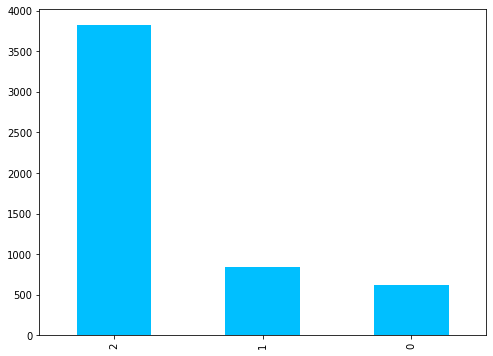

In [6]:
plt.figure(figsize=(8,6))
label=['positive','negative','neutral']
drugs_df.sentiment.value_counts().plot(kind='bar',color='deepskyblue');

## **Text Preprocessing**

In [7]:
corpous = list()
ps = PorterStemmer()
for i in range(len(drugs_df)):
    sent = re.sub(r'[^a-zA-Z]',' ',drugs_df.text[i])
    sent = sent.lower()
    sent = sent.split()
    sent = [ps.stem(word) for word in sent if word not in set(stopwords.words('english'))]
    sent = ' '.join(sent)
    corpous.append(sent)

## **Data Transformation**

### We used CountVectorizer to transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000,ngram_range=(1,3))
X = cv.fit_transform(corpous).toarray()

In [9]:
y = drugs_df.sentiment

## **Handle Imbalnce Data**

In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
new_X, new_y = oversample.fit_resample(X, y)

## **Split Data for training and validation**

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_X,new_y,test_size=0.2,random_state=43)

In [12]:
print(X_train.shape,X_test.shape)

(9180, 3000) (2295, 3000)


## **Model Building**

### **1]Dicision Tree**

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("%.2f"%abs(dt.score(X_test,y_test)*100))

67.80


### **Classification Report**

In [15]:
y_pred1 = dt.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       749
           1       0.68      0.63      0.65       784
           2       0.69      0.61      0.65       762

    accuracy                           0.68      2295
   macro avg       0.68      0.68      0.68      2295
weighted avg       0.68      0.68      0.68      2295



### **Confusion Matrix**

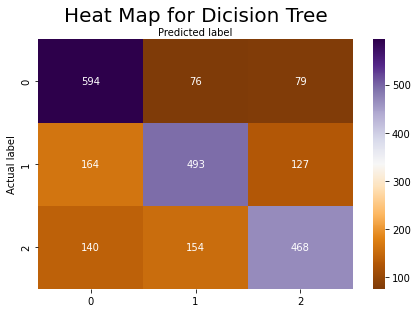

In [16]:
class_names = [0, 1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='PuOr',
            fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Heat Map for Dicision Tree', {'fontsize': 20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


### **2] Random Forest**

In [27]:
rf = RandomForestClassifier(n_estimators=200,criterion='gini')
rf.fit(X_train,y_train)
print("%.2f"%abs(rf.score(X_test,y_test)*100))

78.69


### **Classification Report For Random Forest**

In [18]:
y_pred2 = rf.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       749
           1       0.81      0.71      0.76       784
           2       0.76      0.81      0.79       762

    accuracy                           0.79      2295
   macro avg       0.79      0.79      0.79      2295
weighted avg       0.79      0.79      0.79      2295



### **Confusion Matrix**

In [ ]:
class_names = [0, 1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='PuOr',
            fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Heat Map for Random Forest', {'fontsize': 20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()